In [128]:
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and CSV I/O

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
for root_dir, _, files in os.walk('/kaggle/input'):
    for file in files:
        file_path = os.path.join(root_dir, file)
        print(file_path)


In [129]:
dtf = pd.read_csv("/content/Loan_Status_data.csv")

In [130]:
dtf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [131]:
dtf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [132]:
dtf = dtf.drop(['Loan_ID'], axis=1)

In [133]:
dtf.shape

(614, 12)

In [134]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [135]:
dtf.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [136]:
# Fill missing values with the mode for categorical columns
dtf['Gender'] = dtf['Gender'].fillna(dtf['Gender'].mode().iloc[0])
dtf['Self_Employed'] = dtf['Self_Employed'].fillna(dtf['Self_Employed'].mode().iloc[0])
dtf['Loan_Amount_Term'] = dtf['Loan_Amount_Term'].fillna(dtf['Loan_Amount_Term'].mode().iloc[0]).astype(int)
dtf['Credit_History'] = dtf['Credit_History'].fillna(dtf['Credit_History'].mode().iloc[0]).astype(int)

# Replace specific values and fill missing values for Dependents
dtf['Dependents'] = dtf['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])
dtf['Dependents'] = dtf['Dependents'].fillna(dtf['Dependents'].mode().iloc[0])

# Convert CoapplicantIncome to integer
dtf['CoapplicantIncome'] = dtf['CoapplicantIncome'].astype(int)

# Fill missing values for LoanAmount with the median before converting to integer
dtf['LoanAmount'] = dtf['LoanAmount'].fillna(dtf['LoanAmount'].median()).astype(int)

In [137]:
dtf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0,187,360,1,Urban,Y


In [138]:
dtf.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [139]:
dtf

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0,71,360,1,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0,40,180,1,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240,253,360,1,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0,187,360,1,Urban,Y


In [140]:
dtf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0,128,360,1,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508,128,360,1,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0,141,360,1,Urban,Y


In [141]:
def cat_to_num(dtf, c_var):
    for i in c_var:
        uniques_value = dtf[i].unique()
        # Ensure that the replacement list has the correct length (2) for binary variables
        if len(uniques_value) == 2:
            dtf[i].replace({uniques_value[0]: 0, uniques_value[1]: 1}, inplace=True)
        else:
            # For non-binary variables, assign numerical values incrementally
            replacement_dict = {val: idx for idx, val in enumerate(uniques_value)}
            dtf[i].replace(replacement_dict, inplace=True)

    for i in ['Property_Area']:
        uniques_value = dtf[i].unique()
        dtf[i].replace(uniques_value, [0, 1, 3], inplace=True)

    return dtf

# Apply the function to the DataFrame
dtf = cat_to_num(dtf, c_variables)


In [142]:
dtf.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0.0,0.0,0,0,5849,0,128,360,1,0,0
1,0,1.0,1.0,0,0,4583,1508,128,360,1,1,1
2,0,1.0,0.0,0,1,3000,0,66,360,1,0,0
3,0,1.0,0.0,1,0,2583,2358,120,360,1,0,0
4,0,0.0,0.0,0,0,6000,0,141,360,1,0,0


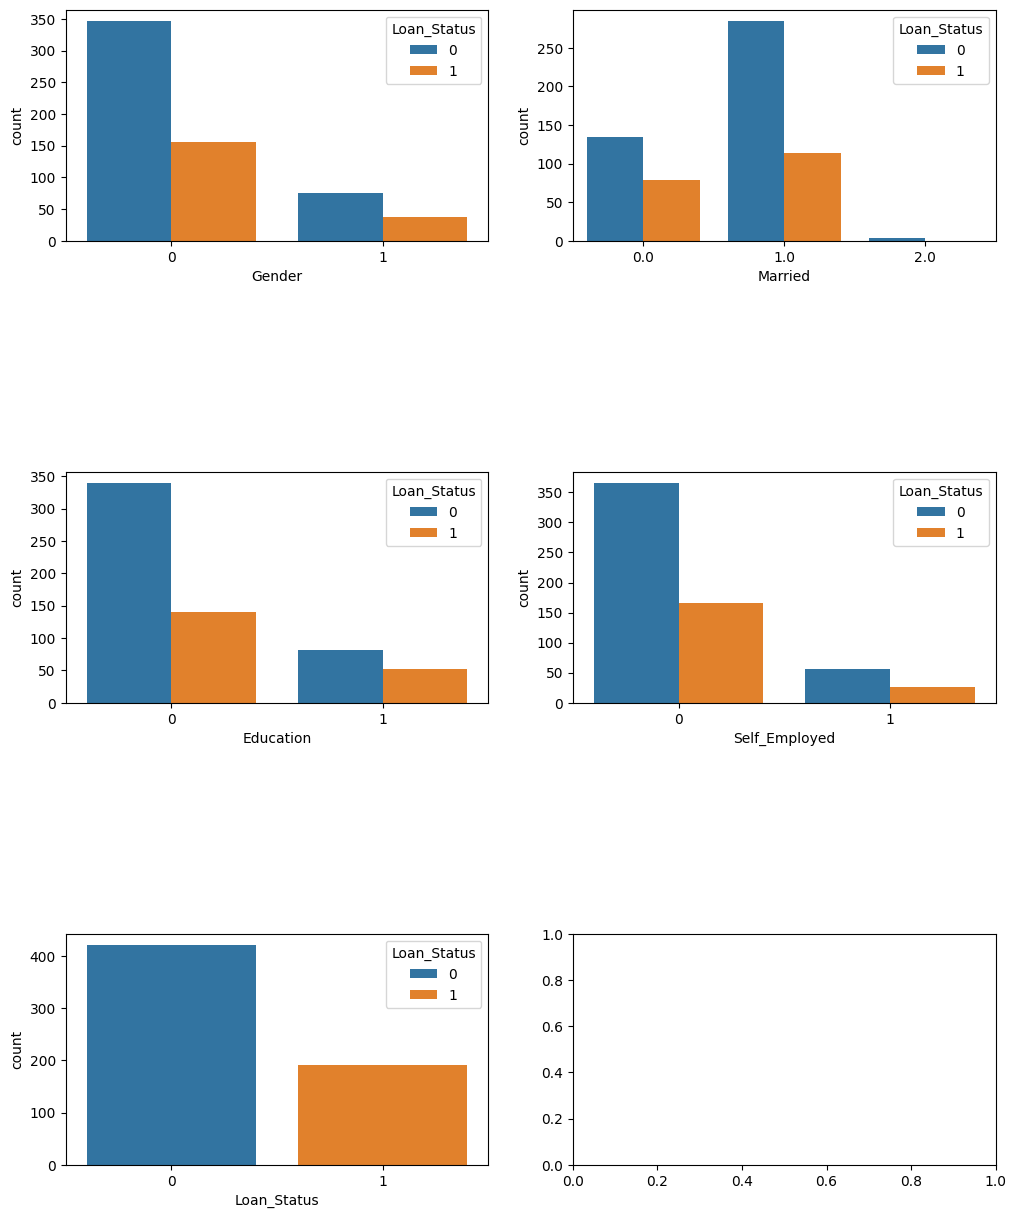

In [143]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=dtf, hue='Loan_Status', ax=ax[row, col])

plt.subplots_adjust(hspace=1)

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000          614.00000  614.000000
mean       5403.459283         1621.24430  145.752443
std        6109.041673         2926.24876   84.107233
min         150.000000            0.00000    9.000000
25%        2877.500000            0.00000  100.250000
50%        3812.500000         1188.50000  128.000000
75%        5795.000000         2297.25000  164.750000
max       81000.000000        41667.00000  700.000000


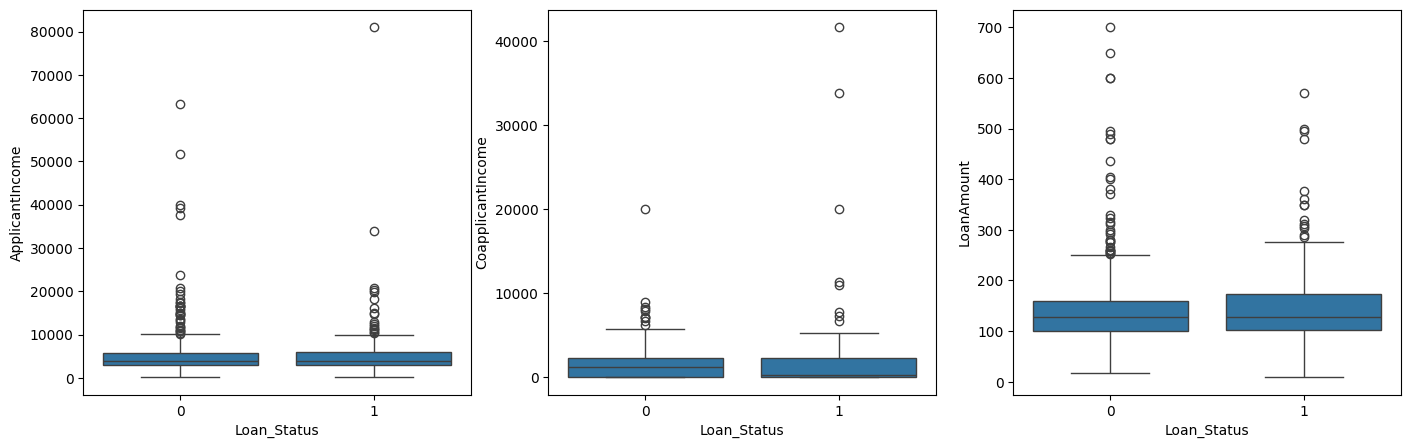

In [144]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=dtf,x='Loan_Status',ax=axes[idx])

print(dtf[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

In [145]:
X = dtf.drop(['Loan_Status'], axis=1)
y = dtf['Loan_Status']

In [146]:
X.shape, y.shape

((614, 11), (614,))

In [147]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((491, 11), (491,), (123, 11), (123,))

In [149]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [151]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)

In [152]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

In [153]:
y_pred = model.predict(X_test)

In [154]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 78.86%
Roc Score: 70.31%


In [155]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79,1,80
1,25,18,43
All,104,19,123
